In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic_df = pd.read_csv("titanic_data.csv")

In [6]:
print titanic_df.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## How did sex and socioeconomic status affect your chance of survival on the Titanic? Were you more likely to survive if you had children on the boat?

### Gender

It is well known from folklore that women (and children) were prioritised for rescue. However, were you more likely to survive if you are woman, and were there other factors that affected your chance of survival?

#### Total male and females, and survival rates

Below are the total number of females and males on the Titanic.

In [7]:
titanic_sex = titanic_df.groupby("Sex")
sex_survival_sum = titanic_sex['Survived'].sum()
print titanic_sex.size()

Sex
female    314
male      577
dtype: int64


Below are the total number of surviving females and males, as well as the survival rates for sex.

In [8]:
print sex_survival_sum
print sex_survival_sum.divide(titanic_sex.size())

Sex
female    233
male      109
Name: Survived, dtype: int64
Sex
female    0.742038
male      0.188908
dtype: float64


### Socioeconomic Factors

#### Fare as a measure of socioeconomic status

Without more data, we can make an estimate of the socioeconomic status of each passenger by looking at the fare they had paid for a ticket.

(array([ 562.,  170.,   67.,   39.,   15.,   16.,    2.,    0.,    9.,
           2.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    3.]),
 array([   0.     ,   25.61646,   51.23292,   76.84938,  102.46584,
         128.0823 ,  153.69876,  179.31522,  204.93168,  230.54814,
         256.1646 ,  281.78106,  307.39752,  333.01398,  358.63044,
         384.2469 ,  409.86336,  435.47982,  461.09628,  486.71274,
         512.3292 ]),
 <a list of 20 Patch objects>)

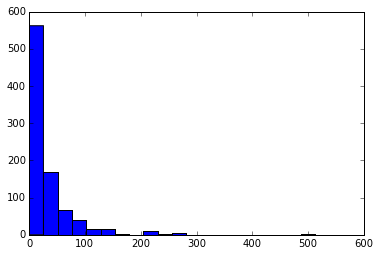

In [37]:
plt.hist(titanic_df['Fare'], bins = 20)

The Fare variable has a clear skewed distribution, with the median salary being under £14.50. The table below shows the mean fares for each group but grouped by the passenger class (1st, 2nd or 3rd class),followed by a histogram showing how the fares are distributed in each class. As we can see there is considerable overlap between the different passenger classes.

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Pclass
1    216
2    184
3    491
Name: Fare, dtype: int64


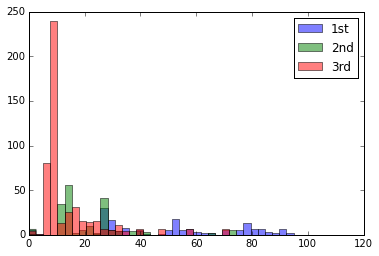

In [20]:
#Group Titanic data by passenger class
titanic_class = titanic_df.groupby("Pclass")
print titanic_class['Fare'].mean()
print titanic_class['Fare'].count()

#Create histogram of 
x = titanic_df.loc[titanic_df['Pclass'] == 1]['Fare'].as_matrix()
y = titanic_df.loc[titanic_df['Pclass'] == 2]['Fare'].as_matrix()
z = titanic_df.loc[titanic_df['Pclass'] == 3]['Fare'].as_matrix()

bins = np.linspace(0, 100, 40)

plt.hist(x, bins, alpha=0.5, label='1st')
plt.hist(y, bins, alpha=0.5, label='2nd')
plt.hist(z, bins, alpha=0.5, label='3rd')
plt.legend(loc='upper right')
plt.show()



We can go further in our analysis of what this data means and calculate if there is a rank correlation between the fare price, and the passenger class - treating class as a ordinal variable, since passenger class is clear not a linear scale. We can do this by using Spearman's Rank Correlation.

### Performing Spearman's Rank Correlation hypothesis test for association between fare and passenger class
###Null and alternative hypotheses

- $H_0$: The null hypothesis is that there is no association between fare price and passenger class
- $H_1$: The alternative hypothesis is that there is no association between fare price and passenger class.

Setting $\alpha = 0.05$, we have a confidence level of 95% for our two-tailed hypothesis test
The critical p-values of the test returned will be less than 0.05

The Spearman test shows that is a very low p value (see below) so we can reject $H_0$, and accept $H_1$ - there is an association between fare price and passenger class.

In [21]:
from scipy.stats import spearmanr
print spearmanr(titanic_df[['Pclass','Fare']])

(-0.6880316726256096, 6.1945537314229761e-126)


To analyse this data, I have standardized the Fare variable

In [ ]:
titanic_df['fare_std'] = (titanic_df['Fare'] - titanic_df['Fare'].mean())/titanic_df['Fare'].std(ddof=0)